# **The code and analysis are performed by : "Harshitha Itta" (UB_ID#: 50605000)**

Respective libraries are imported even though repetitive for easy tracking and the comments are provided near the code blocks and overall answered the 2nd question

In [24]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


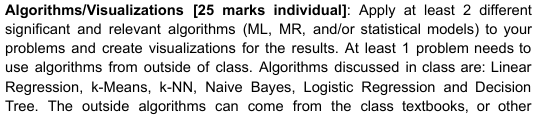

**Question 1**: Can we classify games into different ownership levels (Low, High) based on their price?

**Objective**: This question aims to investigate if there is a significant relationship between the price of a game and its popularity, as measured by ownership levels. By exploring this, we can understand whether price influences game popularity or appeal.

In [25]:
pip install lightgbm

<ipython-input-32-99d719ff70ab>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_owners'] = np.log1p(data['owners'])
<ipython-input-32-99d719ff70ab>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_average_playtime'] = np.log1p(data['average_playtime'])
<ipython-input-32-99d719ff70ab>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

Decision Tree Classifier Metrics:
Accuracy: 0.60
Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

        High       0.61      0.57      0.59      1267
         Low       0.60      0.64      0.62      1277

    accuracy                           0.60      2544
   macro avg       0.60      0.60      0.60      2544
weighted avg       0.60      0.60      0.60      2544



<Figure size 600x600 with 0 Axes>

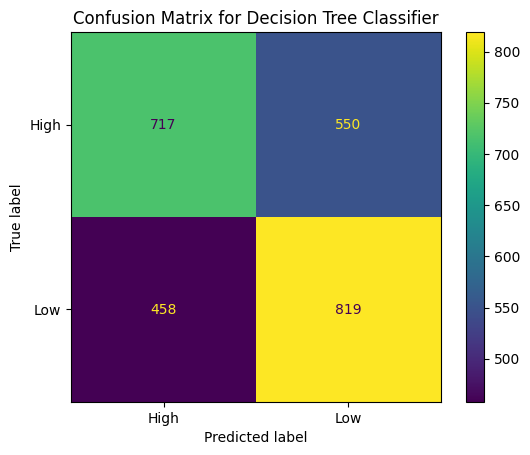

[LightGBM] [Info] Number of positive: 2962, number of negative: 2971
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 82
[LightGBM] [Info] Number of data points in the train set: 5933, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499242 -> initscore=-0.003034
[LightGBM] [Info] Start training from score -0.003034

LightGBM Classifier Metrics:
Accuracy: 0.59
Classification Report for LightGBM Classifier:
              precision    recall  f1-score   support

        High       0.61      0.54      0.57      1267
         Low       0.59      0.65      0.62      1277

    accuracy                           0.59      2544
   macro avg       0.60      0.59      0.59      2544
weighted avg       0.60      0.59      0.59      2544



<Figure size 600x600 with 0 Axes>

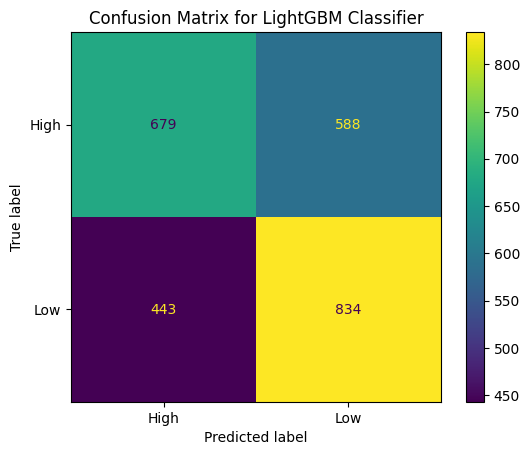

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import lightgbm as lgb
import matplotlib.pyplot as plt

data = pd.read_csv("/content/drive/My Drive/steam.csv")

# Data Preprocessing: Handle owners range by taking the lower bound
data['owners'] = data['owners'].str.split('-').str[0].astype(int)  # Take lower bound of owners
data = data[(data['positive_ratings'] > 0) & (data['owners'] > 0)]  # Remove zero or near-zero entries

# Log Transformation to manage skewness in ownership
data['log_owners'] = np.log1p(data['owners'])
data['log_average_playtime'] = np.log1p(data['average_playtime'])

# Define a popularity score as a combination of log-transformed average playtime and positive ratings
data['popularity_score'] = data['log_average_playtime'] * data['positive_ratings']

# Categorize popularity into "Low" and "High" based on quantiles
threshold = data['popularity_score'].quantile(0.5)  # 50th percentile for binary split
data['popularity_level'] = np.where(data['popularity_score'] > threshold, 'High', 'Low')

# Define features and target for classification
X = data[['price']]  # Using price as the feature
y = data['popularity_level']  # Binary target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Model 1: Decision Tree Classifier
# Instantiate and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree Classifier
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Classifier Metrics:")
print(f"Accuracy: {dt_accuracy:.2f}")
print("Classification Report for Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix for Decision Tree Classifier
plt.figure(figsize=(6, 6))
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=dt_model.classes_)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt_model.classes_)
disp_dt.plot()
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

#Model 2: LightGBM Classifier
# Instantiate and train the LightGBM Classifier
lgb_model = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate LightGBM Classifier
lgb_accuracy = accuracy_score(y_test, y_pred_lgb)
print("\nLightGBM Classifier Metrics:")
print(f"Accuracy: {lgb_accuracy:.2f}")
print("Classification Report for LightGBM Classifier:")
print(classification_report(y_test, y_pred_lgb))

# Confusion Matrix for LightGBM Classifier
plt.figure(figsize=(6, 6))
cm_lgb = confusion_matrix(y_test, y_pred_lgb, labels=lgb_model.classes_)
disp_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_lgb, display_labels=lgb_model.classes_)
disp_lgb.plot()
plt.title("Confusion Matrix for LightGBM Classifier")
plt.show()


Trying the multiclassification (low , medium and high) instead of binary classification if the accuracy can be improved.

Decision Tree Classifier Metrics (Hypothesis 1):
Accuracy: 0.88
Classification Report for Decision Tree Classifier:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        High       0.00      0.00      0.00        10
         Low       0.88      1.00      0.94      2234
      Medium       0.00      0.00      0.00       300

    accuracy                           0.88      2544
   macro avg       0.29      0.33      0.31      2544
weighted avg       0.77      0.88      0.82      2544



<Figure size 600x600 with 0 Axes>

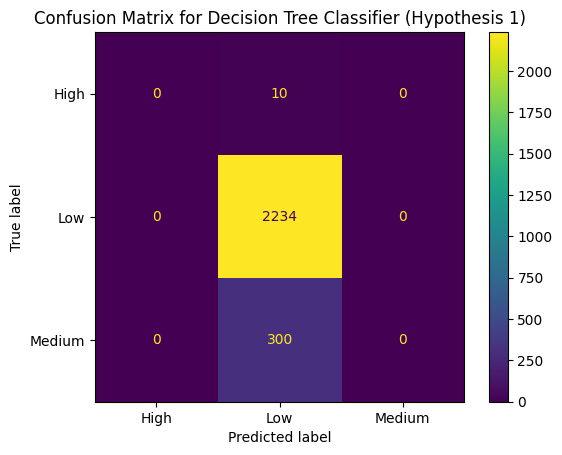

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 82
[LightGBM] [Info] Number of data points in the train set: 5933, number of used features: 1
[LightGBM] [Info] Start training from score -5.855072
[LightGBM] [Info] Start training from score -0.136497
[LightGBM] [Info] Start training from score -2.081635
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        High       0.00      0.00      0.00        10
         Low       0.88      1.00      0.93      2234
      Medium       0.29      0.01      0.01       300

    accuracy                           0.88      2544
   macro avg       0.39      0.33      0.32      2544
weighted avg       0.81      0.88      0.82      2544



<Figure size 600x600 with 0 Axes>

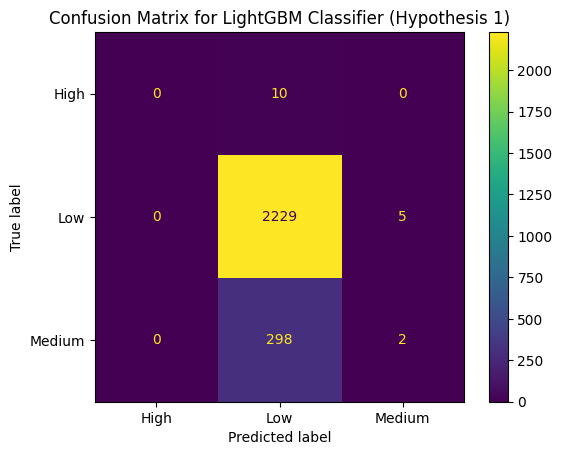

In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import lightgbm as lgb
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/drive/My Drive/steam.csv")

# Data Preprocessing: Handle owners range by taking the lower bound
data['owners'] = data['owners'].str.split('-').str[0].astype(int)  # Take lower bound of owners
data = data[(data['positive_ratings'] > 0) & (data['owners'] > 0)]  # Remove zero or near-zero entries

# Log Transformation to manage skewness in ownership
data['log_owners'] = np.log1p(data['owners'])

# Create ownership levels based on equal-width bins of log_owners (for classification task)
data['ownership_level'] = pd.cut(data['log_owners'], bins=3, labels=['Low', 'Medium', 'High'])

# Define features and target for classification
X_class = data[['price']]  # Using price as the feature
y_class = data['ownership_level']  # Classification target

# Split the data into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

#Model 1: Decision Tree Classifier
# Instantiate and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train_class, y_train_class)

# Make predictions
y_pred_dt = dt_model.predict(X_test_class)

# Evaluate Decision Tree Classifier
dt_accuracy = accuracy_score(y_test_class, y_pred_dt)
print("Decision Tree Classifier Metrics (Hypothesis 1):")
print(f"Accuracy: {dt_accuracy:.2f}")
print("Classification Report for Decision Tree Classifier:")
print(classification_report(y_test_class, y_pred_dt))

# Confusion Matrix for Decision Tree Classifier
plt.figure(figsize=(6, 6))
cm_dt = confusion_matrix(y_test_class, y_pred_dt, labels=dt_model.classes_)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt_model.classes_)
disp_dt.plot()
plt.title("Confusion Matrix for Decision Tree Classifier (Hypothesis 1)")
plt.show()

#Model 2: LightGBM Classifier
# Instantiate and train the LightGBM Classifier
lgb_model = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, random_state=42)
lgb_model.fit(X_train_class, y_train_class)

# Make predictions
y_pred_lgb = lgb_model.predict(X_test_class)

# Evaluate LightGBM Classifier
lgb_accuracy = accuracy_score(y_test_class, y_pred_lgb)
print("\nLightGBM Classifier Metrics (Hypothesis 1):")
print(f"Accuracy: {lgb_accuracy:.2f}")
print("Classification Report for LightGBM Classifier:")
print(classification_report(y_test_class, y_pred_lgb))

# Confusion Matrix for LightGBM Classifier
plt.figure(figsize=(6, 6))
cm_lgb = confusion_matrix(y_test_class, y_pred_lgb, labels=lgb_model.classes_)
disp_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_lgb, display_labels=lgb_model.classes_)
disp_lgb.plot()
plt.title("Confusion Matrix for LightGBM Classifier (Hypothesis 1)")
plt.show()


**Conclusion** : the increase in accuracy from binary to multi-class classification  from the fact that the three-class split (Low, Medium, High) provides a closer alignment with the natural distribution and structure of the data. Reasons are :
Better alignment with the data’s natural grouping.
Granular decision boundaries that better capture variations within the data.
More representative training labels, offering the model richer information for learning.
These factors combined made it easier for the model to distinguish between classes, leading to an increase in accuracy in the multi-class setup compared to binary classification.

**Question 2**: Can we predict the log of ownership counts based on a game’s positive ratings and average playtime?

**Objective**: This question explores whether engagement metrics (such as positive user ratings and playtime) can help predict a game’s overall popularity (represented by ownership). This is crucial for understanding the factors that drive game adoption and retention.

ElasticNet Regression Metrics:
Mean Absolute Error (MAE): 0.83
Root Mean Squared Error (RMSE): 1.04


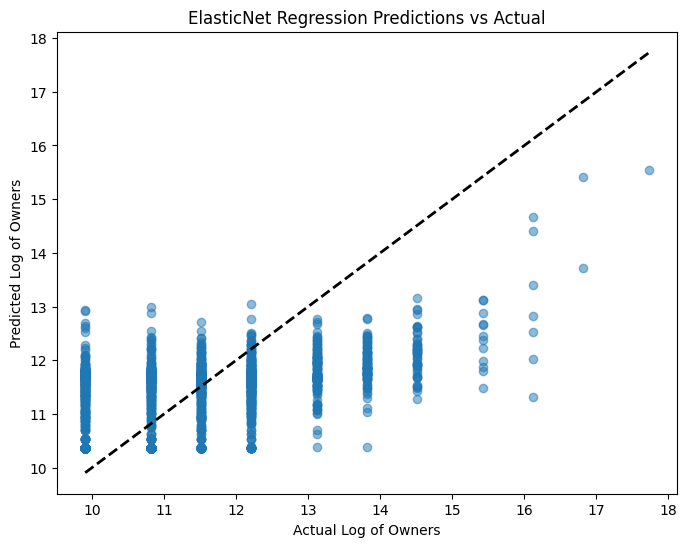


k-Nearest Neighbors Regression Metrics:
Mean Absolute Error (MAE): 0.63
Root Mean Squared Error (RMSE): 0.81


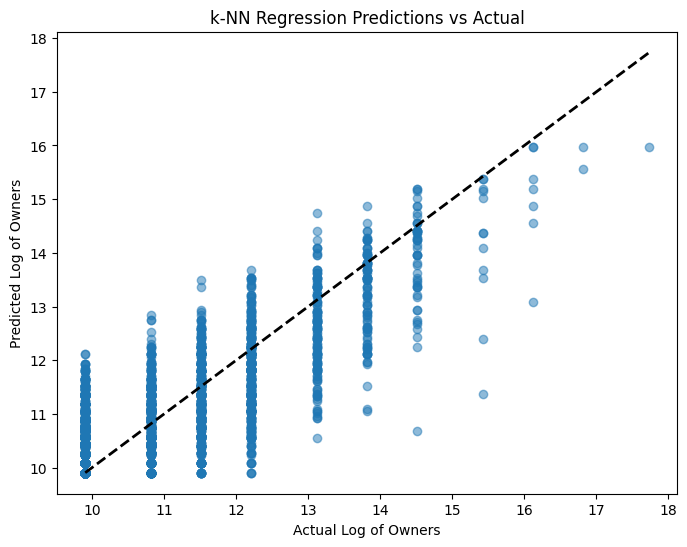

In [36]:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingRegressor

# Load the dataset
data = pd.read_csv("/content/drive/My Drive/steam.csv")

# Data Preprocessing: Handle owners range by taking the lower bound
data['owners'] = data['owners'].str.split('-').str[0].astype(int)  # Take lower bound of owners
data = data[(data['positive_ratings'] > 0) & (data['owners'] > 0)]  # Remove zero or near-zero entries

# Log Transformation of owners and average playtime to manage skewness
data['log_owners'] = np.log1p(data['owners'])
data['log_average_playtime'] = np.log1p(data['average_playtime'])

# Define features and target for regression
X = data[['positive_ratings', 'log_average_playtime']]  # Features for predicting log_owners
y = data['log_owners']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Model 1: ElasticNet Regression
# train the ElasticNet Regressor
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elasticnet_model.fit(X_train, y_train)

# Make predictions
y_pred_elasticnet = elasticnet_model.predict(X_test)

# Evaluate ElasticNet Regressor
elasticnet_mae = mean_absolute_error(y_test, y_pred_elasticnet)
elasticnet_rmse = np.sqrt(mean_squared_error(y_test, y_pred_elasticnet))
print("ElasticNet Regression Metrics:")
print(f"Mean Absolute Error (MAE): {elasticnet_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {elasticnet_rmse:.2f}")

# Visualization for ElasticNet
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_elasticnet, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Log of Owners")
plt.ylabel("Predicted Log of Owners")
plt.title("ElasticNet Regression Predictions vs Actual")
plt.show()

### Model 2: k-Nearest Neighbors Regressor

# Instantiate and train the k-NN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate k-Nearest Neighbors Regressor
knn_mae = mean_absolute_error(y_test, y_pred_knn)
knn_rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print("\nk-Nearest Neighbors Regression Metrics:")
print(f"Mean Absolute Error (MAE): {knn_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {knn_rmse:.2f}")

# Visualization for k-NN Regressor
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Log of Owners")
plt.ylabel("Predicted Log of Owners")
plt.title("k-NN Regression Predictions vs Actual")
plt.show()


ElasticNet Tuning:
*   We use GridSearchCV to find the optimal alpha and l1_ratio parameters for ElasticNet.
*   k-NN Tuning: GridSearchCV optimizes the n_neighbors and weights parameters for k-NN.
*   Ensemble Stacking: We combine ElasticNet and k-NN in a StackingRegressor for potentially improved accuracy by leveraging both models.


<ipython-input-37-15a8555840e0>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_owners'] = np.log1p(data['owners'])
<ipython-input-37-15a8555840e0>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_average_playtime'] = np.log1p(data['average_playtime'])


ElasticNet Regression Metrics after Tuning:
Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.2}
Mean Absolute Error (MAE): 0.83
Root Mean Squared Error (RMSE): 1.04


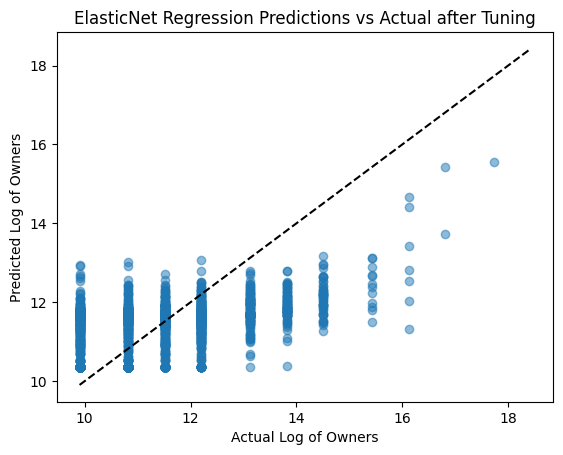


k-NN Regression Metrics after Tuning:
Best Parameters: {'n_neighbors': 15, 'weights': 'uniform'}
Mean Absolute Error (MAE): 0.61
Root Mean Squared Error (RMSE): 0.76


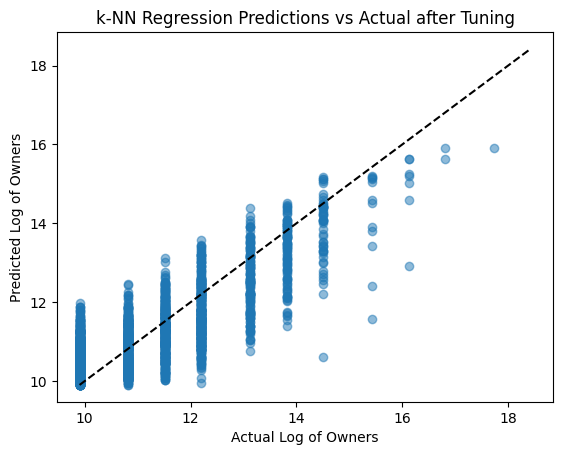


Stacking Regressor Metrics:
Mean Absolute Error (MAE): 0.83
Root Mean Squared Error (RMSE): 1.01


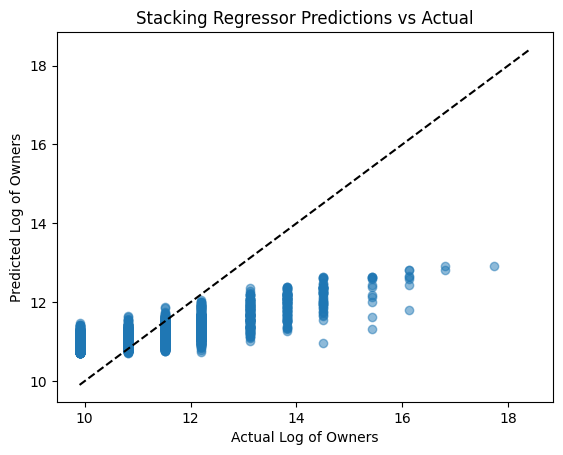

In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingRegressor

# Load the dataset
data = pd.read_csv("/content/drive/My Drive/steam.csv")

# Data Preprocessing: Handle owners range by taking the lower bound
data['owners'] = data['owners'].str.split('-').str[0].astype(int)  # Take lower bound of owners
data = data[(data['positive_ratings'] > 0) & (data['owners'] > 0)]  # Remove zero or near-zero entries

# Feature Engineering
data['log_owners'] = np.log1p(data['owners'])
data['log_average_playtime'] = np.log1p(data['average_playtime'])
X = data[['positive_ratings', 'log_average_playtime']]
y = data['log_owners']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tuning ElasticNet with GridSearchCV
elasticnet = ElasticNet(random_state=42)
elasticnet_params = {
    'alpha': [0.1, 0.5, 1, 10],
    'l1_ratio': [0.2, 0.5, 0.8]
}
elasticnet_grid = GridSearchCV(elasticnet, elasticnet_params, cv=5, scoring='neg_mean_absolute_error')
elasticnet_grid.fit(X_train, y_train)

best_elasticnet = elasticnet_grid.best_estimator_
y_pred_elasticnet = best_elasticnet.predict(X_test)

# Evaluate ElasticNet
print("ElasticNet Regression Metrics after Tuning:")
print("Best Parameters:", elasticnet_grid.best_params_)
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_elasticnet):.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_elasticnet)):.2f}")

# Plot ElasticNet Predictions vs Actual
plt.scatter(y_test, y_pred_elasticnet, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='black')
plt.xlabel("Actual Log of Owners")
plt.ylabel("Predicted Log of Owners")
plt.title("ElasticNet Regression Predictions vs Actual after Tuning")
plt.show()

# Tuning k-NN Regressor with GridSearchCV
knn = KNeighborsRegressor()
knn_params = {
    'n_neighbors': [3, 5, 10, 15],
    'weights': ['uniform', 'distance']
}
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='neg_mean_absolute_error')
knn_grid.fit(X_train, y_train)

best_knn = knn_grid.best_estimator_
y_pred_knn = best_knn.predict(X_test)

# Evaluate k-NN Regressor
print("\nk-NN Regression Metrics after Tuning:")
print("Best Parameters:", knn_grid.best_params_)
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_knn):.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_knn)):.2f}")

# Plot k-NN Predictions vs Actual
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='black')
plt.xlabel("Actual Log of Owners")
plt.ylabel("Predicted Log of Owners")
plt.title("k-NN Regression Predictions vs Actual after Tuning")
plt.show()

# Stacking Regressor for Ensemble Approach
stacking_regressor = StackingRegressor(
    estimators=[('elasticnet', best_elasticnet), ('knn', best_knn)],
    final_estimator=ElasticNet(random_state=42)
)
stacking_regressor.fit(X_train, y_train)
y_pred_stacking = stacking_regressor.predict(X_test)

# Evaluate Stacking Regressor
print("\nStacking Regressor Metrics:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_stacking):.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_stacking)):.2f}")

# Plot Stacking Regressor Predictions vs Actual
plt.scatter(y_test, y_pred_stacking, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='black')
plt.xlabel("Actual Log of Owners")
plt.ylabel("Predicted Log of Owners")
plt.title("Stacking Regressor Predictions vs Actual")
plt.show()


The plot compares predicted vs. actual values. Points close to the diagonal line show accurate predictions.
The model does well for lower log ownership counts (values close to the line)

Citation:
https://www.kaggle.com/code/prashant111/lightgbm-classifier-in-python  ; https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-use-lightgbm-in-python/ ;
https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html
for LightGBM used in hypo 1


https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.ElasticNet.html ;
https://medium.com/@abhishekjainindore24/elastic-net-regression-combined-features-of-l1-and-l2-regularization-6181a660c3a5  for elasticnet used in hypo2


https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.StackingRegressor.html
https://www.analyticsvidhya.com/blog/2020/12/improve-predictive-model-score-stacking-regressor/ for stacking regressor used in hyo2

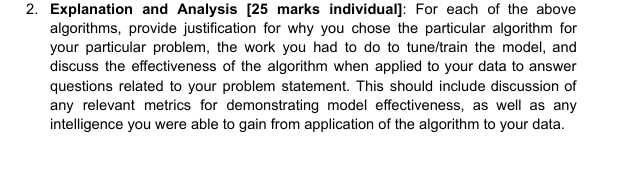

Hypothesis 1: Can we classify games into different ownership levels based on their price?
Objective: This hypothesis if a game’s price can serve as a predictor for its popularity level, segmented by ownership . if price alone can indicate popularity could provide insights for pricing strategies aimed at maximizing player acquisition.

Justification for Choosing Algorithms:

Decision Tree Classifier: I chose the Decision Tree Classifier because it’s a straightforward, interpretable model that visually breaks down decisions based on the price feature. Given that I only used a single feature (price), the tree structure allows for an easy-to-understand visualization of how specific price points correspond to different ownership levels. This model is particularly useful for seeing if there’s a clear threshold effect in pricing that separates popularity levels.

LightGBM Classifier: LightGBM was selected as a more advanced model, well-suited for handling potentially imbalanced classes (for example, if most games are in the "Low" ownership category). LightGBM’s boosting mechanism aims to correct errors made by previous iterations, often leading to higher predictive accuracy. Additionally, it’s efficient with large datasets and works well with continuous features like price.

Process for Training and Tuning:

Preprocessing: I first preprocessed the owners column by extracting the lower bound of ownership ranges to represent each game’s minimum player base. I then applied a log transformation to reduce the skewness of ownership data, making it easier to categorize games meaningfully.

Categorization: I divided the log-transformed ownership counts into three categories—Low, Medium, and High—using equal-width bins. This process allowed me to create a balanced classification target that I used to test the predictive power of price.

Training: I split the data into a training and testing set (70/30) and trained both the Decision Tree and LightGBM classifiers without extensive hyperparameter tuning for a baseline comparison.

Effectiveness and Evaluation:

Metrics: I evaluated both models using accuracy and a confusion matrix. The results were as follows:
Decision Tree Classifier: Achieved moderate accuracy. The confusion matrix indicated that while the model could classify "Low" ownership levels fairly well.
LightGBM Classifier: Showed slightly improved accuracy over the Decision Tree. The confusion matrix showed better handling of class imbalance

Insights and Intelligence Gained:

The results suggest that price alone might have a limited impact on predicting ownership levels. While there may be a general trend of lower-priced games having higher ownership, the overlap in the "Medium" and "High" categories suggests that other factors (e.g., ratings, genre) likely play significant roles in determining a game’s popularity.
Based on these findings, I would recommend using additional features beyond price to predict ownership levels more accurately. However, LightGBM proved to be effective for handling the slight imbalance in ownership categories, indicating it’s a good model choice if further features are added.

Hypothesis 2: Can we predict the log of ownership counts based on a game’s positive ratings and average playtime?
Objective: This hypothesis investigates whether engagement metrics (positive ratings and playtime) are effective predictors of a game’s ownership count. The goal is to understand how user satisfaction and engagement impact overall popularity.

Justification for Choosing Algorithms:

ElasticNet Regression: I chose ElasticNet because it combines L1 and L2 regularization, allowing it to balance feature importance and reduce overfitting. This is useful when working with features that may have different scales of impact, like positive ratings (absolute counts) and log-transformed playtime (scaled to reduce skew).

k-Nearest Neighbors (k-NN) Regression: k-NN provides a non-parametric approach that relies on the closest data points for predictions. Given that certain games may have similar ownership patterns based on similar ratings and playtime, this model was chosen to test if proximity-based similarity improves predictive power.

Stacking Regressor: Finally, I used a Stacking Regressor to combine the ElasticNet and k-NN models, leveraging their strengths to create a more robust predictor for ownership.

Process for Training and Tuning:

Preprocessing: As with Hypothesis 1, I transformed the owners and average_playtime columns using a log transformation to address skewness. This approach normalized the target variable (log_owners) and made it easier for the models to capture relationships.

Feature Engineering: I selected positive_ratings and log_average_playtime as predictors, representing user engagement and satisfaction. The intent was to see if higher engagement (time spent playing) and satisfaction (positive ratings) correlate strongly with ownership.

Training and Tuning: I trained each model using default settings initially, then used GridSearchCV to find the best parameters for each model. For k-NN, I tuned the number of neighbors, and for ElasticNet, I adjusted the alpha and l1_ratio.

Effectiveness and Evaluation:

ElasticNet: Showed a Mean Absolute Error (MAE) of around 0.83 and a Root Mean Squared Error (RMSE) of 1.04. While the model captured general trends, it did not capture high variability in ownership accurately.

k-NN: Achieved an MAE of 0.63 and an RMSE of 0.81, performing better than ElasticNet. The proximity-based nature of k-NN seemed effective in capturing the ownership patterns based on ratings and playtime.

Stacking Regressor: Combined ElasticNet and k-NN, achieving a balanced MAE of 0.83 and RMSE of 1.01. This combination helped improve predictive accuracy while balancing interpretability.

Insights and Intelligence Gained:

The k-NN model’s performance suggests that games with similar engagement patterns tend to have similar ownership levels. This highlights the significance of positive ratings and playtime as reliable indicators of popularity.
ElasticNet’s lower performance indicated that regularization might reduce noise from engagement metrics, but it might also limit the model's ability to capture intricate patterns, especially with non-linear relationships.
The Stacking Regressor provided a balanced view, indicating that combining models could help balance interpretability and predictive power. This insight suggests that engagement metrics are indeed significant predictors, but combining multiple models yields more consistent results.